# Homework 8
### Initial Setup and Imports

In [1]:
!pip install nltk

In [82]:
%matplotlib inline
import nltk
import pandas as pd

In [3]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\latif\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\latif\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\latif\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\latif\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\latif\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C

True

### 1. Choose a corpus of interest.
I chose Shakespeare's Macbeth from the NLTK corpus dataset. 

In [18]:
 macbeth_corpus= nltk.corpus.gutenberg.words('shakespeare-macbeth.txt')

In [20]:
macbeth = [w for w in macbeth_corpus if w.isalpha()]

### How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

I'm choosing to define unique as the verbs that appear in Macbeth. For this part, I will be using the verb database that NLTK Wordnet has and filter the text of Macbeth for them. 

In [31]:
nltk.download('verbnet')

[nltk_data] Downloading package verbnet to
[nltk_data]     C:\Users\latif\AppData\Roaming\nltk_data...
[nltk_data]   Package verbnet is already up-to-date!


True

In [59]:
from nltk.corpus import wordnet as wn

In [61]:
macbeth_verbs = set()
for w in macbeth:
    if (len(wn.synsets(w)) > 0) and (wn.synsets(w)[0].pos() is 'v'):
        macbeth_verbs.add(w)
        
macbeth_verbs

{'According',
 'Accounted',
 'Accursed',
 'Acquaint',
 'Armed',
 'Armes',
 'Assisted',
 'Attend',
 'Augures',
 'Balles',
 'Began',
 'Behold',
 'Bestride',
 'Beware',
 'Blaspheming',
 'Bleed',
 'Bloody',
 'Blowes',
 'Bosomes',
 'Braines',
 'Bring',
 'Broke',
 'Came',
 'Captaines',
 'Carried',
 'Charmes',
 'Cheekes',
 'Cleanse',
 'Commencing',
 'Commends',
 'Confess',
 'Confound',
 'Confounds',
 'Confronted',
 'Consider',
 'Contending',
 'Cozen',
 'Cozens',
 'Creepes',
 'Crowned',
 'Deny',
 'Descend',
 'Descends',
 'Destroying',
 'Did',
 'Disguising',
 'Distinguishes',
 'Doomes',
 'Dreames',
 'Enter',
 'Except',
 'Excite',
 'Expire',
 'Feares',
 'Fled',
 'Flyes',
 'Fooles',
 'Fortifies',
 'Gentle',
 'Gone',
 'Groomes',
 'Had',
 'Imaginings',
 'Infected',
 'Is',
 'Keepes',
 'Kernes',
 'Layes',
 'Listen',
 'Lookes',
 'Marry',
 'Melted',
 'Mindes',
 'Moones',
 'Mowsing',
 'Painted',
 'Peeres',
 'Pent',
 'Pertaines',
 'Pillowes',
 'Pray',
 'Prayses',
 'Prepares',
 'Producing',
 'Pronounce',


In [62]:
len(macbeth_verbs)

453

We see that there are 453 unique verbs in Macbeth. 

### Taking the most common words, how many unique words represent half of the total words in the corpus?

In [84]:
freq_mac = nltk.FreqDist(macbeth)

freq = -1
for count in range(0, len(macbeth)):
    df = pd.DataFrame(freq_mac.most_common(count),columns=['word','count'])
    freq= sum(df['count'])/float(len(macbeth))
    if freq > 0.5:
        break

print("Words:", count, "Frequency:", freq)

Words: 125 Frequency: 0.500492556918


We see that 125 words make up very close to 50% of the text of Macbeth. 

### Identify the 200 highest frequency words in this corpus

In [87]:
top200 = pd.DataFrame(freq_mac.most_common(200),columns=['word','count'])
top200['frequency'] = top200['count']/float(len(macbeth))
top200.head(10)

,word,count,frequency
0,the,531,0.029061
1,and,376,0.020578
2,I,333,0.018225
3,of,315,0.017239
4,to,311,0.017021
5,d,224,0.012259
6,a,214,0.011712
7,you,184,0.010070
8,in,173,0.009468
9,my,170,0.009304


### Create a graph that shows the relative frequency of these 200 words

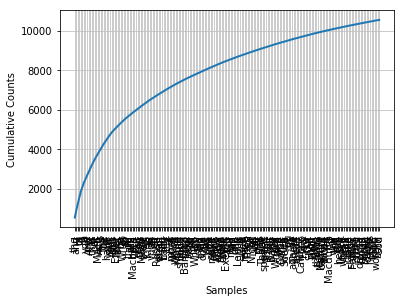

In [81]:
freq_mac.plot(200, cumulative=True)

### Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number N has a frequency of 1/N, meaning that the second place word is frequent about half as such much as the first, and the third word is half as frequent as the second, and so on. 

By this law, the second word -- and -- should have had frequency of around 0.135 since the most common word "the" had a frequency of 0.29, but instead "and" had a frequency of 0.205, so Zipf's Law conditions were not met. 

### In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”
Well, this is Shakespeare we are talking about in 2017. The lexicon involved is quite different, which is why I was curious to see what the results would look like. Interestingly, simply the letter "d" is one of the most common words found. I'm not sure if this was a bug in the code or if it actually represents a word of some sort. 